## Context

* The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

## Attribute information

* Invoice id: Computer generated sales slip invoice identification number

* Branch: Branch of supercenter (3 branches are available identified by A, B and C).

* City: Location of supercenters

* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

* Gender: Gender type of customer

* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

* Unit price: Price of each product in $


* Quantity: Number of products purchased by customer

* Tax: 5% tax fee for customer buying

* Total: Total price including tax

* Date: Date of purchase (Record available from January 2019 to March 2019)

* Time: Purchase time (10am to 9pm)

* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

* COGS: Cost of goods sold

* Gross margin percentage: Gross margin percentage

* Gross income: Gross income

* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Import libraries 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## load data 

In [3]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')

## GENERAL INFORMATION FROM THE DATA

In [6]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
data.shape

(1000, 17)

In [7]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
print('This dataset is from between', data['Date'].min() ,'To', data['Date'].max())

This dataset is from between 1/1/2019 To 3/9/2019


In [11]:
print('We have' , data['Customer type'].nunique() ,'Different Customer Type , That is :',  data['Customer type'].unique())

We have 2 Different Customer Type , That is : ['Member' 'Normal']


In [12]:
print('We have',data['Product line'].nunique(),'Different Product Line Type , That is :',data['Product line'].unique())

We have 6 Different Product Line Type , That is : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [13]:
print('We have',data['Payment'].nunique(),'Different Payment Type , That is :',data['Payment'].unique())

We have 3 Different Payment Type , That is : ['Ewallet' 'Cash' 'Credit card']


## Exploratory Data Analysis

### COUNTPLOT

#### A countplot is kind of likea histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.


In [16]:
def plot_col(col):
    print('values of column are',col,'\n',data[col].value_counts())
    plt.figure(figsize=(12,6))
    sns.countplot(data = data , x =data[col].value_counts() , palette = "magma")
    plt.title(f'{col.title()}')
    plt.show()

In [1]:
plot_col('Branch')

NameError: name 'plot_col' is not defined

#### We can say that the number of Location of are eqal to supercenters Branchs of supercenter

values of column are Branch 
 A    340
B    332
C    328
Name: Branch, dtype: int64


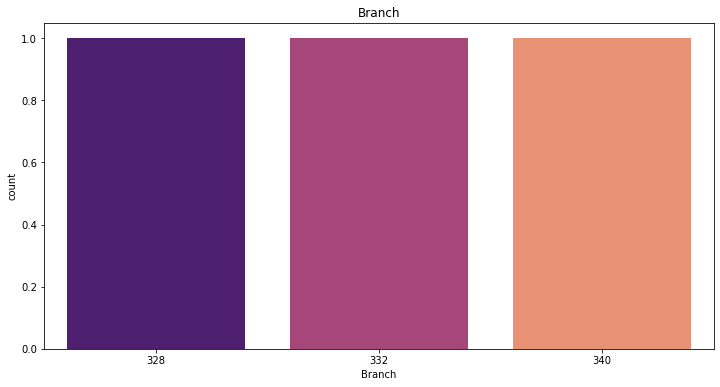

In [18]:
plot_col('Branch')

values of column are Payment 
 Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


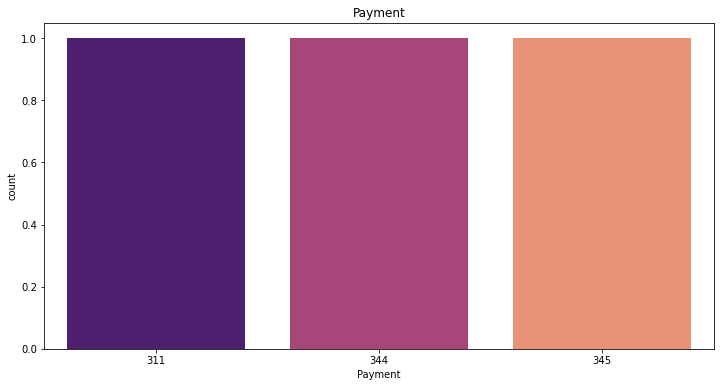

In [19]:
plot_col('Payment')

values of column are Quantity 
 10    119
1     112
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64


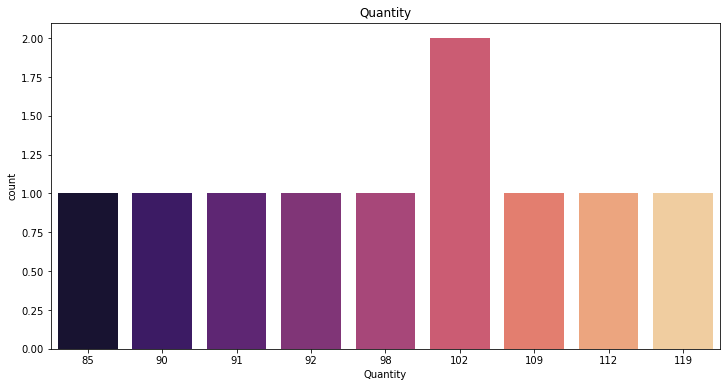

In [20]:
plot_col('Quantity')

values of column are Product line 
 Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


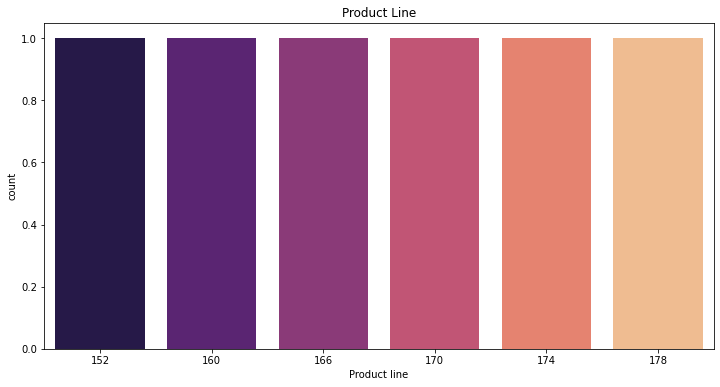

In [21]:
plot_col('Product line')

values of column are Customer type 
 Member    501
Normal    499
Name: Customer type, dtype: int64


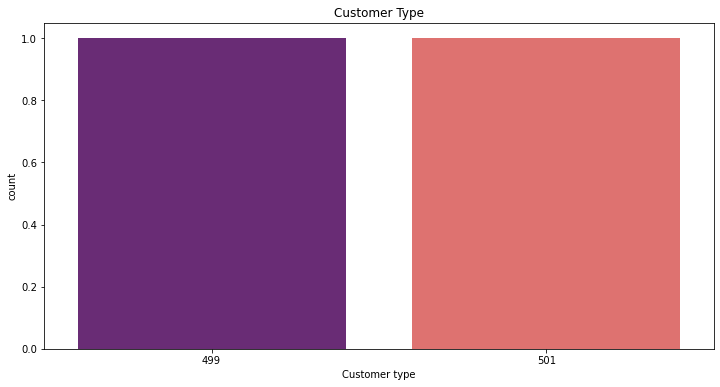

In [22]:
plot_col('Customer type')

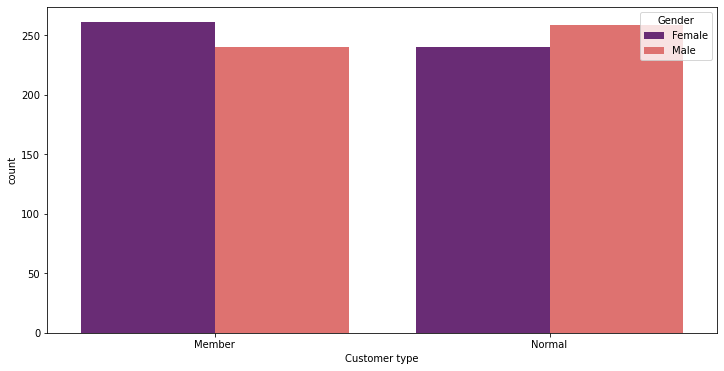

In [26]:
plt.figure(figsize=(12 , 6))
sns.countplot(x = 'Customer type', data = data, hue = 'Gender', palette = "magma")
plt.show()

### pie plot

#### A pie plot is a proportional representation of the numerical data in a column

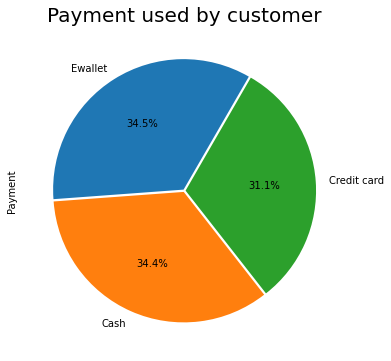

In [23]:
plt.figure(figsize=(12,6))
data['Payment'].value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.1f%%',startangle=60)
plt.title('Payment used by customer',fontsize=20)
plt.show()

### barplot

#### A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.


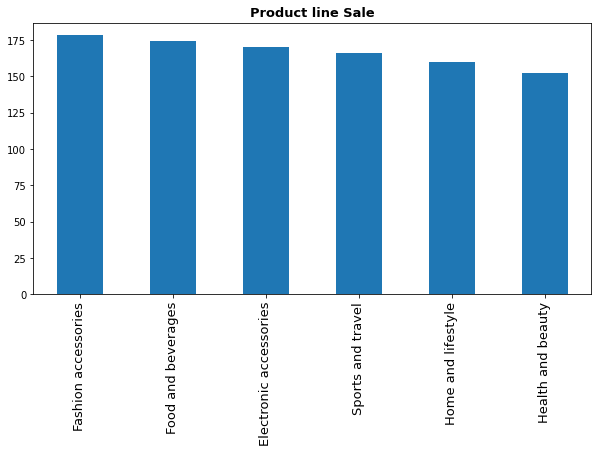

In [48]:
plt.figure(figsize=(10,5))
data['Product line'].value_counts().plot.bar().set_title("Product line Sale",fontsize=13,fontweight='bold')
plt.xticks(fontsize=13)
plt.show()

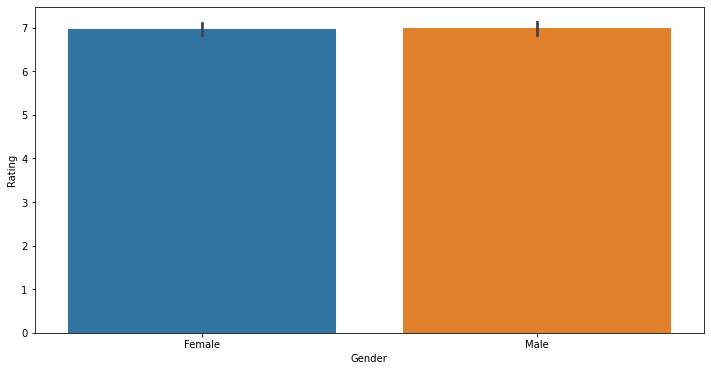

In [49]:
plt.figure(figsize=(12 , 6))
sns.barplot(x='Gender' ,y = 'Rating' , data= data )
plt.show()

### HEATMAP

#### A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.

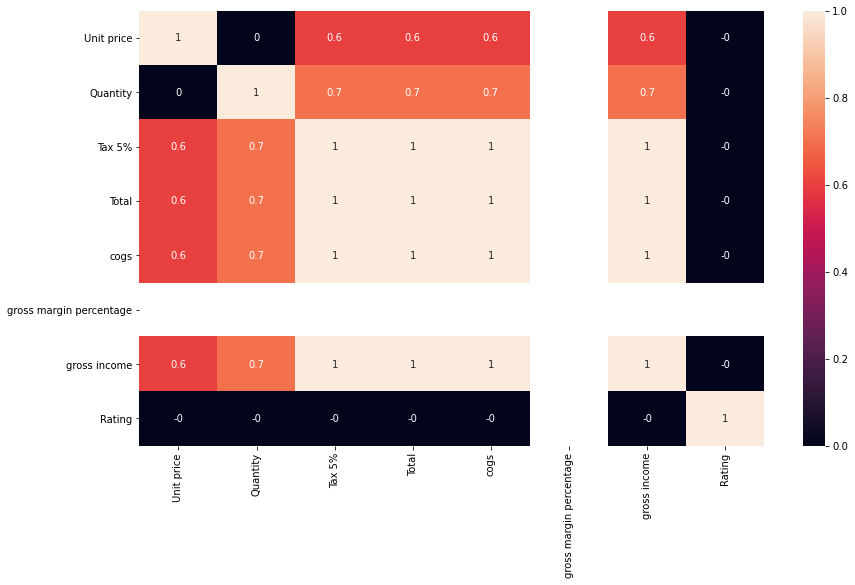

In [50]:
plt.figure(figsize=(14 , 8))
sns.heatmap(round(data.corr() , 1) , annot=True )
plt.show()

### SCATTER PLOT



#### A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.



In [40]:
data.sample()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
678,648-94-3045,C,Naypyitaw,Normal,Male,Health and beauty,58.95,10,29.475,618.975,2/7/2019,14:27,Ewallet,589.5,4.761905,29.475,8.1


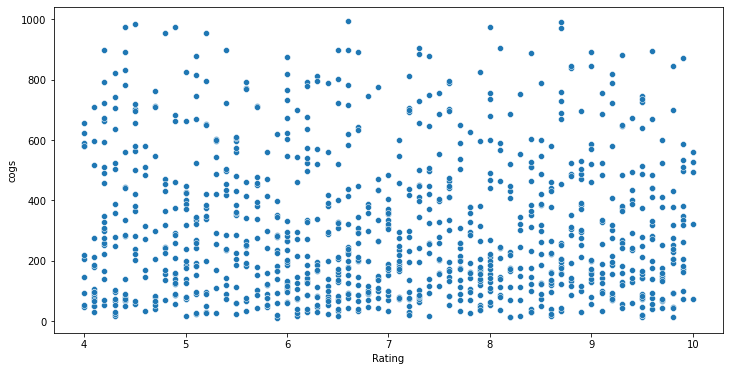

In [52]:
plt.figure(figsize = (12,6))
sns.scatterplot(x ='Rating' , y = 'cogs' , data = data )
plt.show()

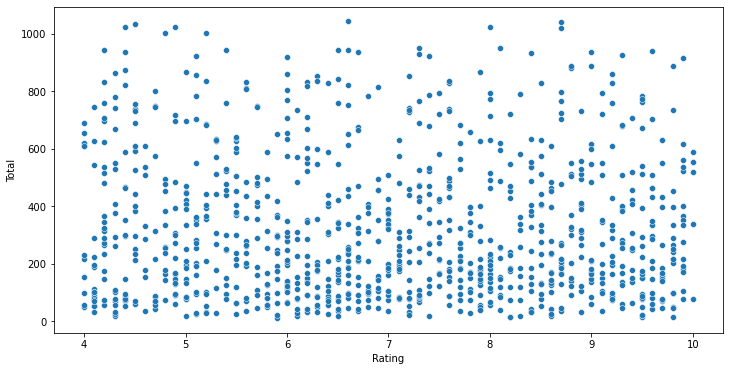

In [53]:
plt.figure(figsize = (12,6))
sns.scatterplot(x ='Rating' , y = 'Total' , data = data )
plt.show()

### BOXPLOT

#### A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.



<AxesSubplot:>

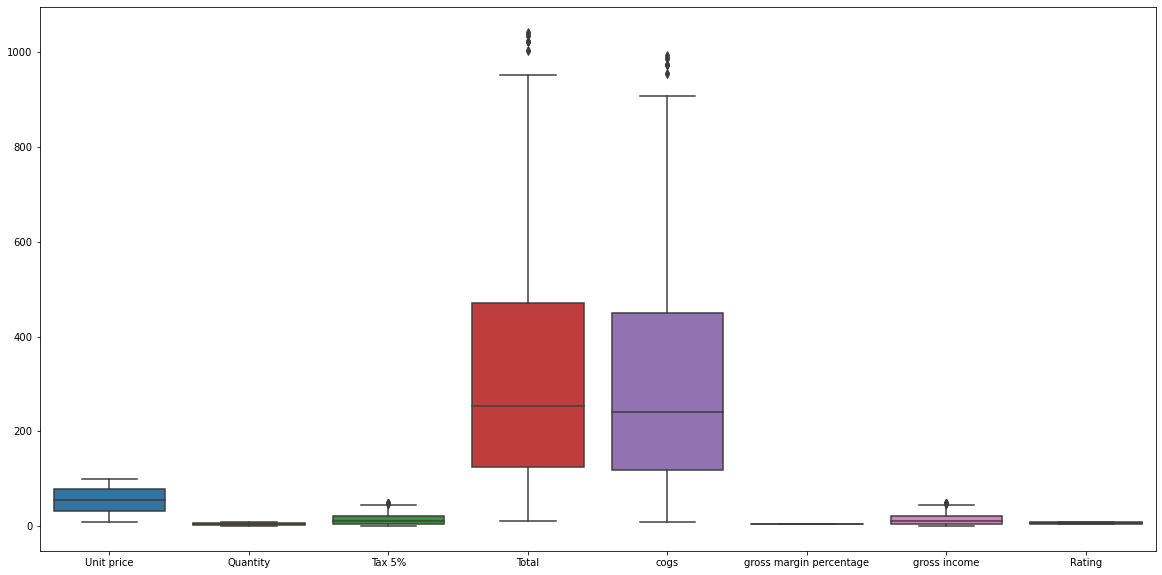

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data)

### PAIRPLOT



#### A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

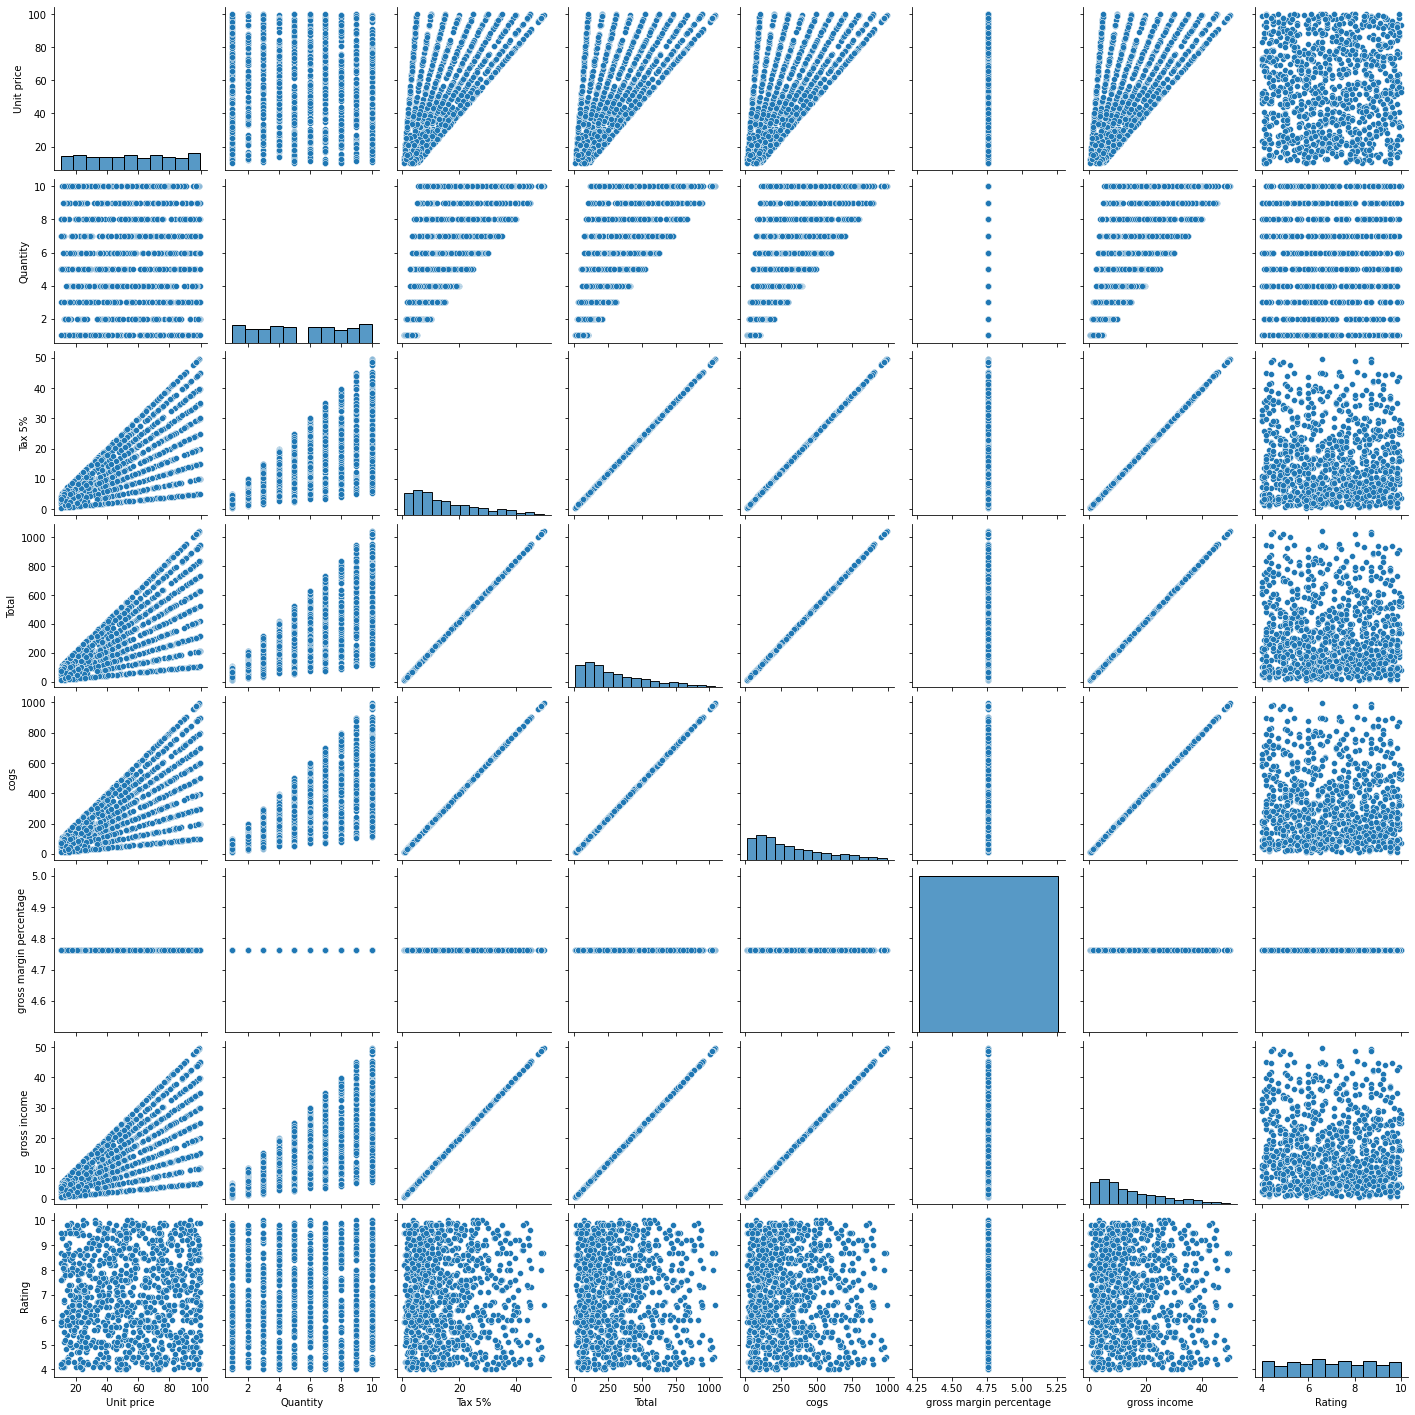

In [29]:
sns.pairplot(data = data)

### Jointplot 

#### A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X)


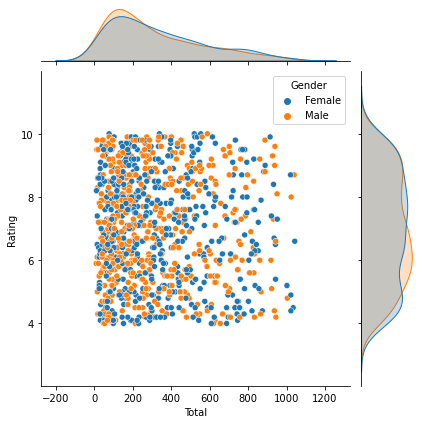

In [30]:
sns.jointplot(x='Total',y='Rating',hue='Gender',data=data)

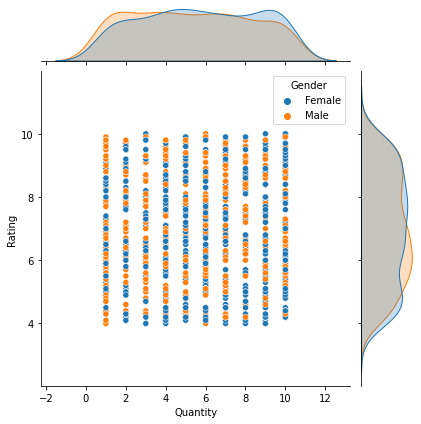

In [31]:
sns.jointplot(x='Quantity',y='Rating',hue='Gender',data=data)

In [33]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

### HISTOGRAM



#### A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.



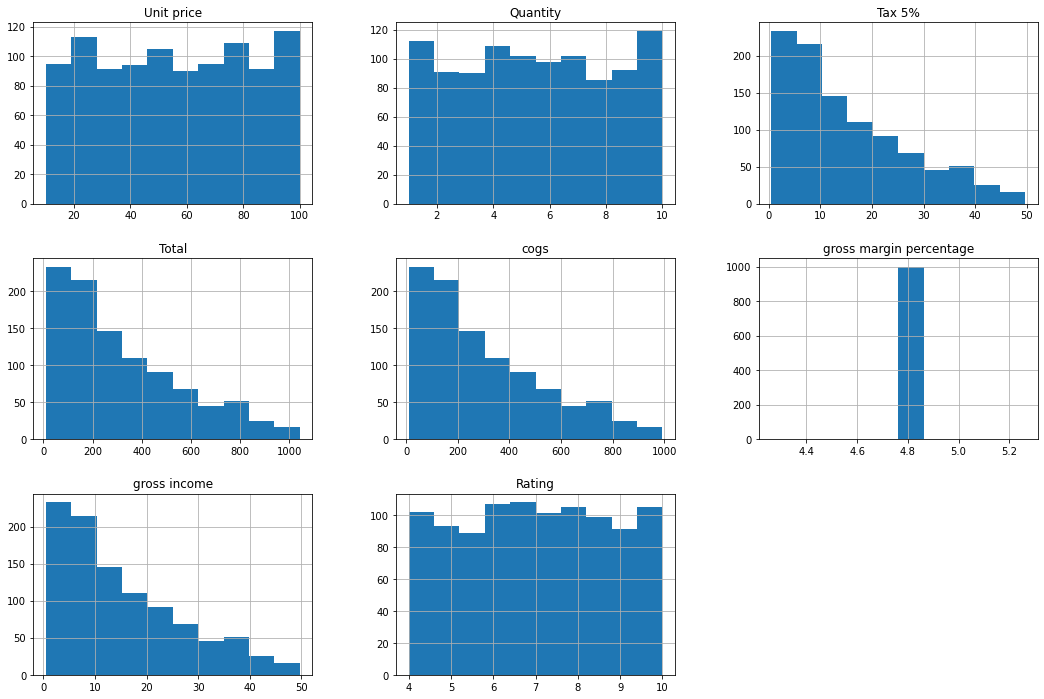

In [56]:
data.hist(figsize=(18,12))
plt.show()

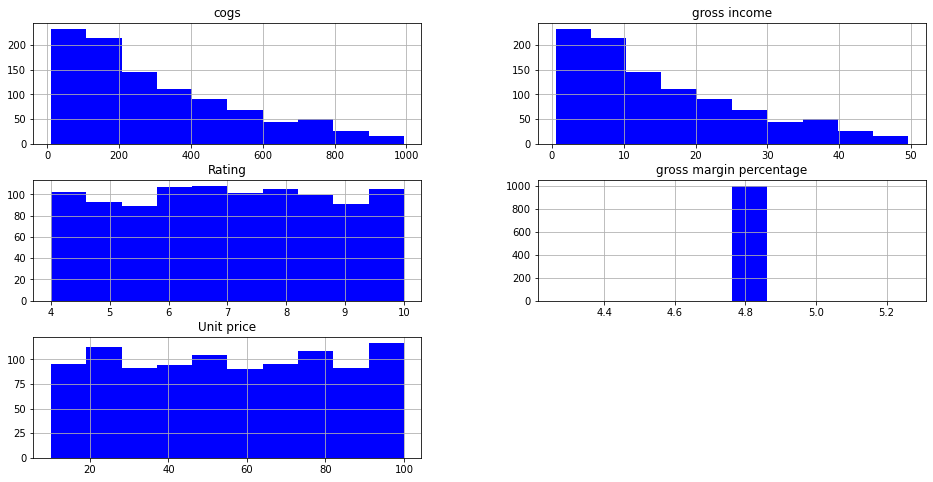

In [38]:
data[['cogs' , 'gross income' ,'Rating' , 'gross margin percentage' , 'Unit price' ]].hist(bins = 10 ,color = 'blue' , figsize=(16,8))
plt.show()

### barplot

#### A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.



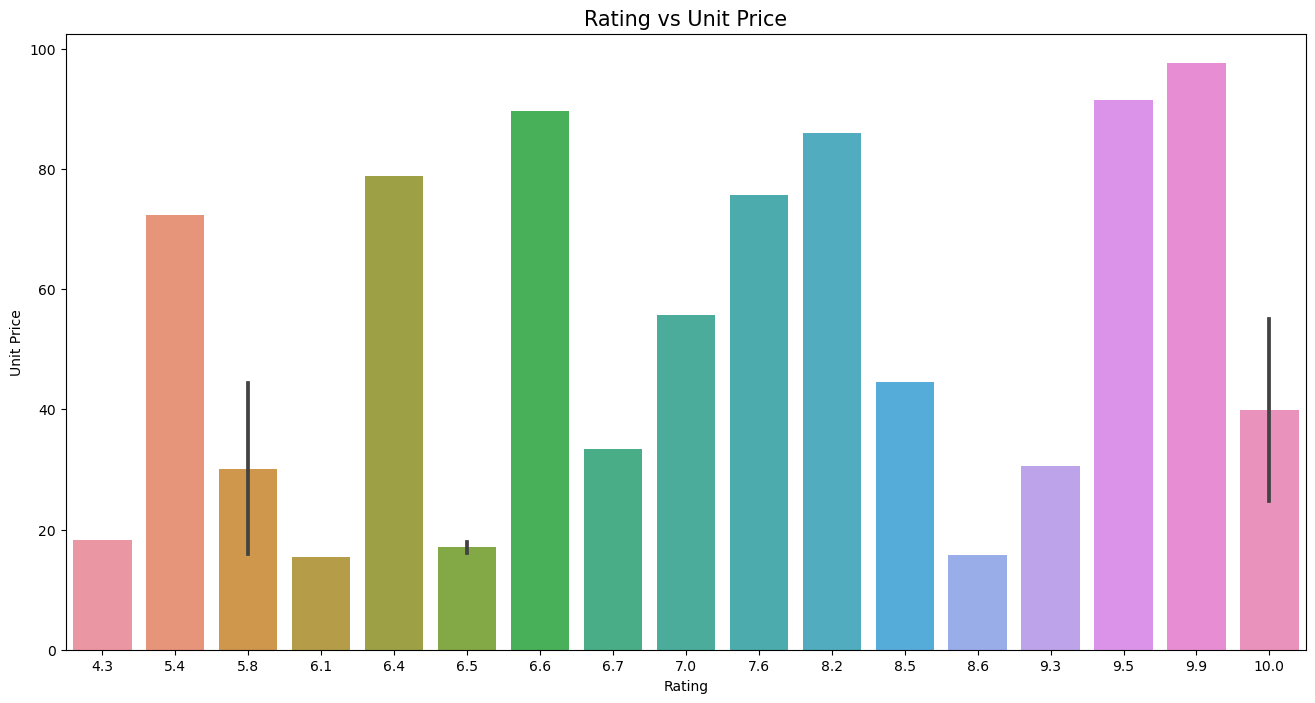

In [75]:
plt.style.use("default")
plt.figure(figsize=(16,8))
sns.barplot(x = 'Rating'  , y="Unit price", data=data[50:70])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

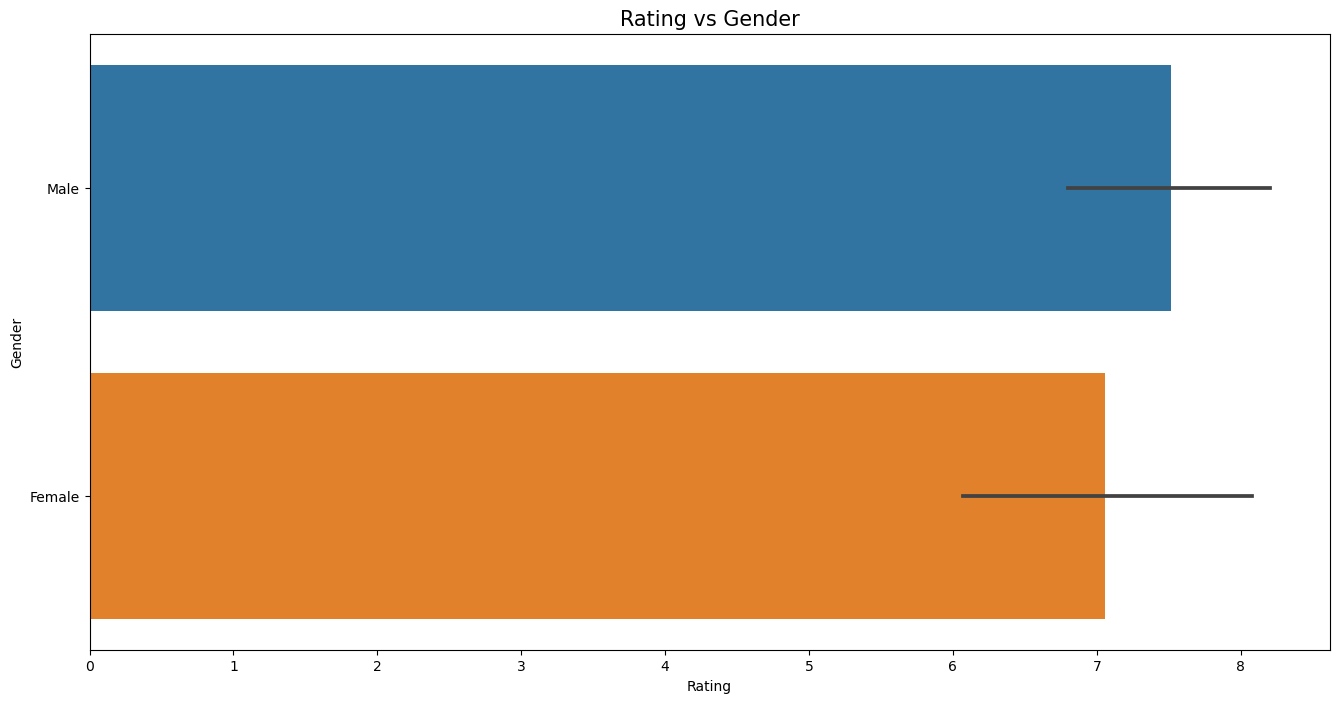

In [77]:
plt.style.use("default")
plt.figure(figsize=(16,8))
sns.barplot(x="Rating", y="Gender", data=data[50:80])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

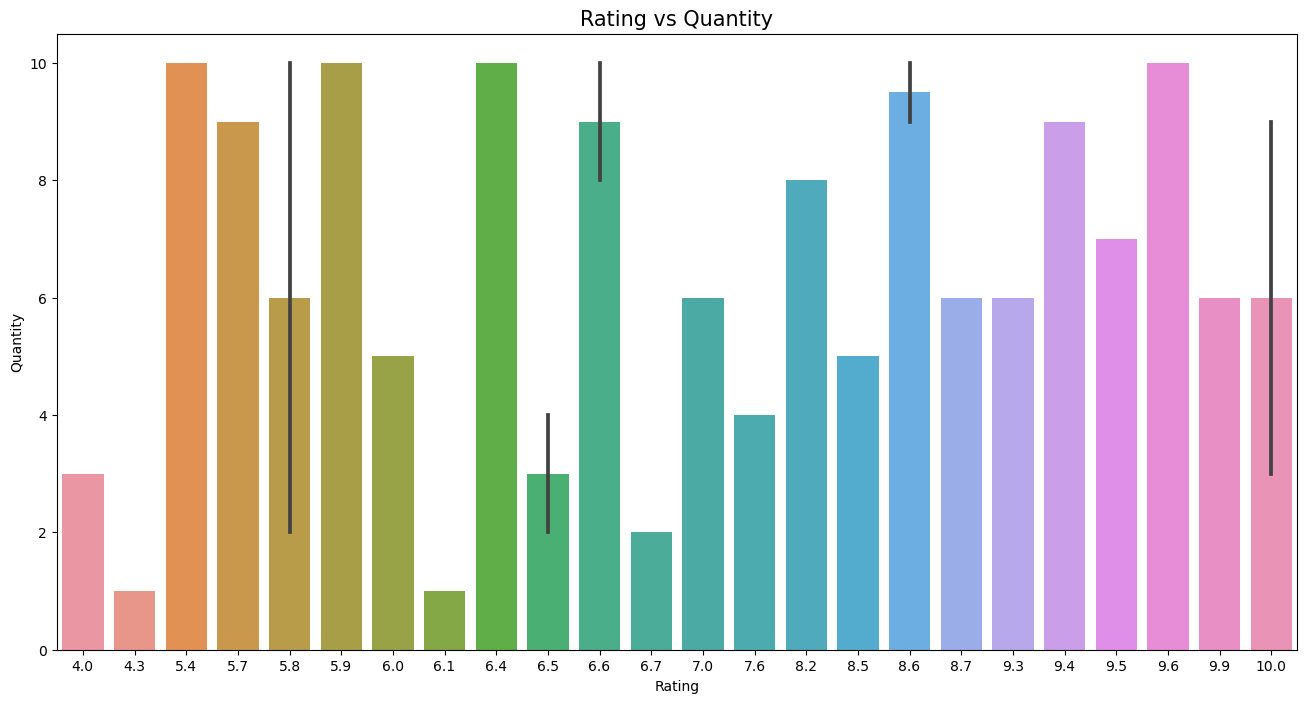

In [74]:
plt.style.use("default")
plt.figure(figsize=(16,8))
sns.barplot(x="Rating", y="Quantity", data=data[50:80])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

In [78]:
#lets find the categorialfeatures
my_listed_data = list(data.columns)

In [79]:
my_listed_data

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [80]:
list_categorical = []
for item in my_listed_data:
    if data[item].dtype=='object':
        list_categorical.append(item)

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
lb = LabelEncoder()

In [83]:
for i in list_categorical:
    data[i]=lb.fit_transform(data[i])

In [84]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [85]:
y=data['Gender']
x=data.drop('Gender',axis=1)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [88]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


## ML MODELS

### KNeighborsClassifier


#### By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier(n_neighbors=6)

In [92]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [112]:
y_pred_knn= knn.predict(x_test)

In [113]:
y_pred_knn

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

In [114]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [115]:
from sklearn.metrics import r2_score , mean_squared_error

In [117]:
print("Classification Report is:\n",classification_report(y_test,y_pred_knn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_knn))
print("Training Score:\n",knn.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.65      0.56       100
           1       0.47      0.31      0.37       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.46       200
weighted avg       0.48      0.48      0.46       200

Confusion Matrix:
 [[65 35]
 [69 31]]
Training Score:
 64.125


### SVC



#### In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

In [98]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [118]:
y_pred_svc = svc.predict(x_test)

In [119]:
y_pred_svc

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1])

In [120]:
print("Classification Report is:\n",classification_report(y_test,y_pred_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_svc))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.49      0.47       100
           1       0.44      0.40      0.42       100

    accuracy                           0.45       200
   macro avg       0.44      0.45      0.44       200
weighted avg       0.44      0.45      0.44       200

Confusion Matrix:
 [[49 51]
 [60 40]]
Training Score:
 55.50000000000001


### Random Forest Classifier



#### A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [123]:
y_pred_rfc  = rfc.predict(x_test)

In [124]:
y_pred_rfc

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [125]:
print("Classification Report is:\n",classification_report(y_test,y_pred_rfc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rfc))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.59      0.54       100
           1       0.50      0.41      0.45       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

Confusion Matrix:
 [[59 41]
 [59 41]]
Training Score:
 100.0


### AdaBoostClassifier



#### An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [107]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [126]:
y_pred_adb = adb.predict(x_test)

In [127]:
y_pred_adb

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [136]:
print("Classification Report is:\n",classification_report(y_test,y_pred_adb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_adb))
print("Training Score:\n",adb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       100
           1       0.54      0.54      0.54       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200

Confusion Matrix:
 [[54 46]
 [46 54]]
Training Score:
 67.0


### Gradient Boosting Classifier



#### Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [133]:
y_pred_gbc = gbc.predict(x_test)

In [134]:
y_pred_gbc

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0])

In [137]:
print("Classification Report is:\n",classification_report(y_test,y_pred_gbc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gbc))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       100
           1       0.48      0.46      0.47       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
 [[51 49]
 [54 46]]
Training Score:
 88.0


### ExtraTreesClassifier


#### Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

In [144]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train , y_train)

ExtraTreesClassifier()

In [145]:
y_pred_etc = etc.predict(x_test)

In [146]:
y_pred_etc

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0])

In [147]:
print("Classification Report is:\n",classification_report(y_test,y_pred_etc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_etc))
print("Training Score:\n",etc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48       100
           1       0.49      0.50      0.50       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Confusion Matrix:
 [[48 52]
 [50 50]]
Training Score:
 100.0


In [148]:
df_Predicted = pd.DataFrame({'Actual' : y_test , 'SVC Predicted' : y_pred_svc ,
                  'Gradient Boosting Classifier Predicted' : y_pred_gbc , 'KNeighborsClassifier Predicted' : y_pred_knn , 
                   'Random Forest Classifier Predicted' : y_pred_rfc , ' AdaBoostClassifier Predicted' :y_pred_adb ,
                   'ExtraTreesClassifier Predicted' : y_pred_etc } )

In [152]:
df_Predicted.set_index('Actual')

,SVC Predicted,Gradient Boosting Classifier Predicted,KNeighborsClassifier Predicted,Random Forest Classifier Predicted,AdaBoostClassifier Predicted,ExtraTreesClassifier Predicted
Actual,,,,,,
1,1,0,1,0,1,1
0,0,0,0,0,0,1
1,0,1,0,1,1,1
1,0,0,1,0,1,0
0,1,0,0,0,0,1
...,...,...,...,...,...,...
1,0,0,0,0,0,1
1,1,1,1,1,1,1
1,1,1,1,0,0,0


## CONCLUSION :

* ACCURACIES OF DIFFERENT MODELS ARE:

* KNeighbors Classifier= 64.75 %

* SVC= 55.50 %

* Random Forest Classifier= 100 %

* Ada Boost Classifier= 67 %

* Gradient Boosting Classifier= 89 %

* Extra Trees Classifier= 100 %

We got a good accuracy of about 100 % using Random Forest Classifier and Extra Trees Classifier which is quite well for the given dataset.